## What I follow?
https://gerardmaggiolino.medium.com/creating-openai-gym-environments-with-pybullet-part-1-13895a622b24


Post Overview:
This post will be the first of a two part series.

PyBullet and Building / Manipulating URDF files
OpenAI Gym Structure and Implementation
We’ll go through building an environment step by step with enough explanations for you to learn how to independently build your own. Code will be displayed first, followed by explanation. Please follow along in Python on your command line.

In [1]:
import pybullet as p
#A simulation is started using the p.connect() method. Several connection modes are available, 
# with p.GUI allowing for visualization and debugging, and p.DIRECT providing the fastest, non-visual connection.
client = p.connect(p.GUI) #The returned value from p.connect() is an integer, and can be passed to other functions to specify which simulation to apply the command to. 
#This is useful if you have multiple physics simulations, and will default to 0 (the first started simulation)
p.setGravity(0, 0, -10, physicsClientId=client) 

The module pybullet_data provides many example Universal Robotic Description Format (URDF) files. We’ll build our own URDF file soon, but for now, just understand that they specify the physical and visual characteristics of a robot.

In [2]:
import pybullet_data
p.setAdditionalSearchPath(pybullet_data.getDataPath())
planeId = p.loadURDF("plane.urdf")

In [3]:
carId = p.loadURDF("racecar/racecar.urdf", basePosition=[0,0,0.2]) #We’ve specified a base position to create the racecar slightly above the plane.


In [4]:
position, orientation = p.getBasePositionAndOrientation(carId) # Notice that as we have only a single physics simulation running, we can omit the physicsClientId argument, which defaults to zero. Running the following:
print(position, orientation)

(0.0, 0.0, 0.2) (0.0, 0.0, 0.0, 1.0)


The car should move forward in the simulation! 
Normally, we would not apply an external force to move the car. 
We would apply a force to the axle of the car to rotate the wheels. 
We’ll first build our own URDF file to understand how robots are structured. 
We’ll then manipulate the joints directly to move the toy car we’ve created.

In [7]:
choose = "Move"
if choose != "Move":
    for _ in range(100): #will run the simulation for 100 time steps. Each time step is 1/240 of a second.
        p.stepSimulation()
else:
    import time
    time.sleep(2.3)
    for _ in range(300): 
        pos, ori = p.getBasePositionAndOrientation(carId)
        p.applyExternalForce(carId, 0, [50, 0, 0], pos, p.WORLD_FRAME)
        p.stepSimulation()
        time.sleep(1 / 200)
    

error: Not connected to physics server.

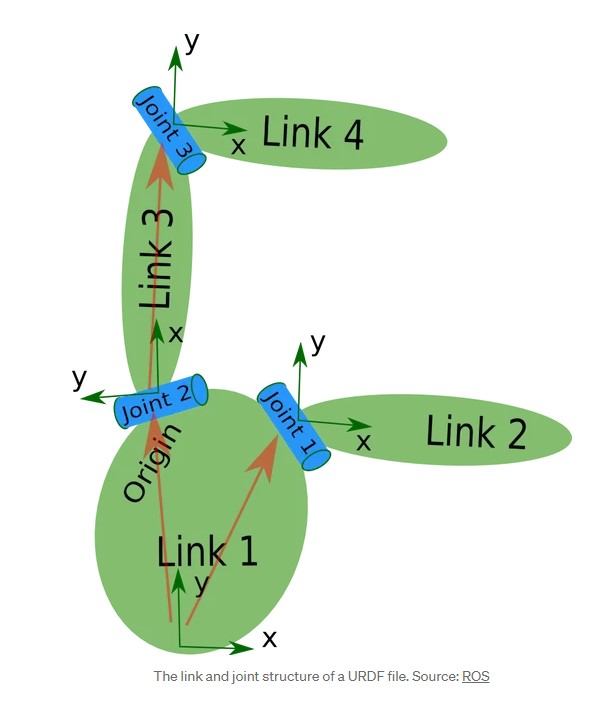

Robots specified with URDF are created from two components, links and joints. 

These components are arranged in a tree structure originating from a base link. 

Forces are applied to joints through PyBullet to control robots.

Links and joints have properties that define their shape and behavior in the simulation; the visual property in the code below is an example. 

URDF files are formatted with XML, a markup language similar in structure to HTML. 

Tags are used to specify and describe the properties of links and joints.


In [1]:
import pybullet as p 
from time import sleep
import os
chk = os.path.exists("./urdfs/racecar.urdf")
print("Path exists!", chk)
p.connect(p.GUI)
p.loadURDF("./urdfs/myown.urdf") 
# p.loadURDF("./urdfs/racecar.urdf") 
sleep(3) 

Path exists! True


In [1]:
import pybullet as p
from time import sleep
import os

# Check if the URDF file exists
urdf_path = "./urdfs/myown.urdf"
chk = os.path.exists(urdf_path)
print("Path exists!", chk)

# Connect to PyBullet and set up the simulation
p.connect(p.GUI)
p.setGravity(0, 0, -9.81)  # Set the gravity

# Load the URDF file
robot_id = p.loadURDF(urdf_path)

# # Create a ground plane
# plane_id = p.createCollisionShape(p.GEOM_PLANE)
# p.createMultiBody(0, plane_id)
# p.resetBasePositionAndOrientation(plane_id, [0, 0, 0], [0, 0, 0, 1])  # Set the position of the ground plane

# Run the simulation for a few seconds
sleep(3)

# Disconnect from the simulation
# p.disconnect()

Path exists! True
